In [18]:
%pylab inline
from scipy.io import loadmat
import seaborn as sns
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [19]:
#BA 17
data=[]#load in all the subjects data
lst=["s11", "s12","s13","s14","s15","s18","s20","s21","s22","s23","s24","s25","s26","s27","s28","s29","s30","s31"]
for i in lst:
    a=np.load('all_subjs_TRs_levels_log_VT%s.npy'% i)
    data.append(a)

In [20]:
x = np.load('all_subjs_TRs_levels_log_VTs11.npy')
x.shape

(1230, 5, 28)

In [3]:
# VT
data2 = []#load in all the subjects data
lst=["s11", "s12","s13","s14","s15","s18","s20","s21","s22","s23","s24","s25","s26","s27","s28","s29","s30","s31"]
for i in lst:
    a=np.load('all_levels_for_all_TR_%s.npy'% i)
    data2.append(a)

In [21]:
data_all = numpy.stack(data,axis=3)#BA17;turn list of arrays into array

In [4]:
data_all2 = numpy.stack(data2,axis=3)#VT; turn list into array

In [23]:
data_all.shape #1230 TR, 5 levels, 28 orientations, 18 subjects; BA17
np.save("data_all_subjects_final_log_VT",data_all)

In [22]:
data_all.shape

(1230, 5, 28, 18)

In [6]:
data_all2.shape #1230 TR, 5 levels, 28 orientations, 18 subjects; VT
np.save("data_all_subjects_final_VT",data_all2)

(1230, 5, 28, 18)

In [5]:
# Load in the condition label file
conditions=loadmat('all_subjects_18/regressors_sh3.mat')
conditions = conditions['regressors_sh3']
conditions.shape #12 labels, 1230trs

(12, 1230)

In [6]:
def convert_binary_to_multiclass(binary_conditions):
    """Convert binary representation into multiclass reprentation:
    For example: convert [[1 1 1 1 0 0 0 0]
                          [0 0 0 0 1 1 1 1]]
    to [1 1 1 1 2 2 2 2]"""
    x,y = np.where(binary_conditions)
    conditions=np.zeros(binary_conditions.shape[1])
    conditions[y]=x+1
    return conditions

conditions_multi = convert_binary_to_multiclass(conditions)
conditions_multi[:123]#first run

array([ 0.,  0.,  0.,  0.,  0.,  8.,  8.,  8.,  8.,  0.,  0.,  0.,  0.,
        0.,  0.,  7.,  7.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
       11., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  5.,  5.,  5.,  5.,  0.,  0.,  0.,
        0.,  0.,  0., 10., 10., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  3.,
        3.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  0., 12., 12., 12., 12.,  0.,  0.,  0.,  0.,  0.,
        0.,  4.,  4.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  6.,
        6.,  6.,  0.,  0.,  0.,  0.])

In [8]:
insect1 = conditions_multi == 1
insect2 = conditions_multi == 2
insect3 = conditions_multi == 3
insect4 = conditions_multi == 4
bird1 = conditions_multi == 5
bird2 = conditions_multi == 6
bird3 = conditions_multi == 7
bird4 = conditions_multi == 8
monkey1 = conditions_multi == 9
monkey2 = conditions_multi == 10
monkey3 = conditions_multi == 11
monkey4 = conditions_multi == 12

In [9]:
# Now I would like to calculate the mean of the 28 orientations of 5 levels. Then, to compare 4 monkeys on each level
monkey1_5L_MeanOri=data_all[monkey1].mean(axis=2)
monkey2_5L_MeanOri=data_all[monkey2].mean(axis=2)
monkey3_5L_MeanOri=data_all[monkey3].mean(axis=2)
monkey4_5L_MeanOri=data_all[monkey4].mean(axis=2)
insect1_5L_MeanOri=data_all[insect1].mean(axis=2)
insect2_5L_MeanOri=data_all[insect2].mean(axis=2)
insect3_5L_MeanOri=data_all[insect3].mean(axis=2)
insect4_5L_MeanOri=data_all[insect4].mean(axis=2)
bird1_5L_MeanOri=data_all[bird1].mean(axis=2)
bird2_5L_MeanOri=data_all[bird2].mean(axis=2)
bird3_5L_MeanOri=data_all[bird3].mean(axis=2)
bird4_5L_MeanOri=data_all[bird4].mean(axis=2)

In [10]:
# In this cell, i will calculate the relative scores between 
# different animals both between categories and within categories.
# All of these will be done in one cell to avoid confusion.

# check the shape of monkey1
print(monkey1_5L_MeanOri.shape)

# take the mean of the TRs
print(monkey1_5L_MeanOri.mean(axis=0).shape)  # 5 levels and 18 subjects

# The above gives the right shape, so i will proceed to use
# these data for later studies. As a first step, i will make 
# a shorter name for each of the animal data to prepare for
# later study
m1 = monkey1_5L_MeanOri.mean(axis=0)
m2 = monkey2_5L_MeanOri.mean(axis=0)
m3 = monkey3_5L_MeanOri.mean(axis=0)
m4 = monkey4_5L_MeanOri.mean(axis=0)
i1 = insect1_5L_MeanOri.mean(axis=0)
i2 = insect2_5L_MeanOri.mean(axis=0)
i3 = insect3_5L_MeanOri.mean(axis=0)
i4 = insect4_5L_MeanOri.mean(axis=0)
b1 = bird1_5L_MeanOri.mean(axis=0)
b2 = bird2_5L_MeanOri.mean(axis=0)
b3 = bird3_5L_MeanOri.mean(axis=0)
b4 = bird4_5L_MeanOri.mean(axis=0)

# next i would like to define a list that 
# represents the categories 
# update on 11/16: change this to name only and 
# associate the names and actual data in a dictionary
# called animals
categories = [['m1','m2','m3','m4'], ['i1','i2','i3','i4'], ['b1','b2','b3','b4']]
# update on 11/16:
# this is the dictionary used to associate the name with 
# the actual data of each animal. For example, to get
# the data for m1, use animals['m1'], and so on. 
animals = {
    'm1': m1,
    'm2': m2,
    'm3': m3,
    'm4': m4,
    'i1': i1,
    'i2': i2,
    'i3': i3,
    'i4': i4,
    'b1': b1,
    'b2': b2,
    'b3': b3,
    'b4': b4,
}

# first, calculate the within categories scores for a specific 
# level and subject (for example subject 0 and level 0)
subject = 0
level = 0

# we will use permutation tool from itertools to generate pairs
# of animals to compare with
from itertools import combinations 

# a quick test, just to make sure i understand this combinations function
t = [1,2,3,4]
print("TESTING: pairs of animals: ", list(combinations(t, 2)))

# good, now i understand this, i will proceed to use this to generate
# the within group score differences
# loop over categories
for category in categories:
    # for each categories, generate pairs of animals 
    # within this category and get the difference between
    # their scores
    pairs = list(combinations(category, 2))
    for pair in pairs:
        # get the names of the two animals
        name1 = pair[0]
        name2 = pair[1]
        # get the two animals data using animals dictionary
        animal1 = animals[name1]
        animal2 = animals[name2]
        # get their scores and calculate the differences
        score1 = animal1[level,subject]
        score2 = animal2[level,subject]
        # calculate the absolute difference between the scores
        score_diff = abs(score1-score2)
        print("Score diff: ", score_diff)
    
# these seem to work properly. Note that this is only to test the 
# codes to calculate the different scores, in the end one needs
# to store these score differences somewhere such as in a dataframe. 
# Next we want to figure out how to generate the score differences for
# cross categories. Try the product function from itertools
from itertools import product
a = [1,2,3,4]
b = [5,6,7,8,9,10,11,12]
print("TESTING: pairs cross category: ", list(product(a,b)))

# the above codes seem to be working, next we want to apply 
# this to our studies, first we will generate pairs of categories
# to compare with, for this we can use te combinations method we 
# used previously, and then we will use the product function to 
# calculate the scores for all pairs of animals between these 
# pair of categories. 
# first choose a pair of categories
pair_categories = list(combinations(categories, 2))
for pair_category in pair_categories:
    # get the two categories in the pair
    category1 = pair_category[0]
    category2 = pair_category[1]
    # find all pairs of animals between these two categories
    pairs = list(product(category1, category2))
    # loop over each pair and calculate the score
    for pair in pairs:
        # get the name of the animals
        name1 = pair[0]
        name2 = pair[1]
        # get the data of the two animals
        animal1 = animals[name1]
        animal2 = animals[name2]
        # get the score the the two animals
        score1 = animal1[level,subject]
        score2 = animal2[level,subject]
        score_diff = abs(score1-score2)
        print("Score diff cross categories: ", score_diff)

# this seems to be working as well. so now we are ready to loop
# over sucjects and levels and append our results to a dataframe
# for further processing in R

########################
# start actual program #
########################

# first create an empty dataframe
df = pd.DataFrame(columns=['Sub_ID','Levels','Pair','Within','Abs_score_diff'])
for subject in range(18):
    for level in range(5):
        # within categories -> copied from above
        for category in categories:
            # for each categories, generate pairs of animals 
            # within this category and get the difference between
            # their scores
            pairs = list(combinations(category, 2))
            for pair in pairs:
                # get the names of the two animals
                name1 = pair[0]
                name2 = pair[1]
                # get the two animals data using animals dictionary
                animal1 = animals[name1]
                animal2 = animals[name2]
                # get their scores and calculate the differences
                # update on 11/16: use log on the scores
                score1 = np.log(animal1[level,subject])
                score2 = np.log(animal2[level,subject])
                # calculate the absolute difference between the scores
                score_diff = abs(score1-score2)
                # append the result to the dataframe
                df = df.append({'Sub_ID': subject, 
                                'Levels': level,
                                'Pair': "%s-%s" % (name1, name2),
                                'Within': 1,
                                'Abs_score_diff': score_diff}, ignore_index=True)
                
        # cross categories -> copied from above                
        pair_categories = list(combinations(categories, 2))
        for pair_category in pair_categories:
            # get the two categories in the pair
            category1 = pair_category[0]
            category2 = pair_category[1]
            # find all pairs of animals between these two categories
            pairs = list(product(category1, category2))
            # loop over each pair and calculate the score
            for pair in pairs:
                # get the name of the animals
                name1 = pair[0]
                name2 = pair[1]
                # get the data of the two animals
                animal1 = animals[name1]
                animal2 = animals[name2]
                # get the score of the animals
                # update on 11/16: use log on the scores
                score1 = np.log(animal1[level,subject])
                score2 = np.log(animal2[level,subject])
                score_diff = abs(score1-score2)
                # append the results to the dataframe
                df = df.append({'Sub_ID': subject, 
                                'Levels': level,
                                'Pair': "%s-%s" % (name1, name2),
                                'Within': 0,
                                'Abs_score_diff': score_diff}, ignore_index=True)
df.to_csv("cross_within_BA17.csv", index=True)

(40, 5, 18)
(5, 18)
('TESTING: pairs of animals: ', [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])
('Score diff: ', 0.0004228825)
('Score diff: ', 8.6862245e-05)
('Score diff: ', 0.00054284255)
('Score diff: ', 0.00033602025)
('Score diff: ', 0.00011996005)
('Score diff: ', 0.0004559803)
('Score diff: ', 5.5151293e-05)
('Score diff: ', 0.00031534524)
('Score diff: ', 0.0003682673)
('Score diff: ', 0.00026019395)
('Score diff: ', 0.000313116)
('Score diff: ', 5.2922056e-05)
('Score diff: ', 6.541191e-05)
('Score diff: ', 0.00021962903)
('Score diff: ', 0.00015854975)
('Score diff: ', 0.00015421712)
('Score diff: ', 9.3137845e-05)
('Score diff: ', 6.107928e-05)
('TESTING: pairs cross category: ', [(1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12)])
('Score diff cross cate

In [11]:
df.head()

,Sub_ID,Levels,Pair,Within,Abs_score_diff
0,0,0,m1-m2,1,0.245048
1,0,0,m1-m3,1,0.045668
2,0,0,m1-m4,1,0.327094
3,0,0,m2-m3,1,0.199379
4,0,0,m2-m4,1,0.082047


In [11]:
# Now I would like to take out all the levels info for all the animals. 
monkey1_L1=monkey1_5L_MeanOri[:,0,:]
monkey2_L1=monkey2_5L_MeanOri[:,0,:]
monkey3_L1=monkey3_5L_MeanOri[:,0,:]
monkey4_L1=monkey4_5L_MeanOri[:,0,:]

monkey1_L2=monkey1_5L_MeanOri[:,1,:]
monkey2_L2=monkey2_5L_MeanOri[:,1,:]
monkey3_L2=monkey3_5L_MeanOri[:,1,:]
monkey4_L2=monkey4_5L_MeanOri[:,1,:]

monkey1_L3=monkey1_5L_MeanOri[:,2,:]
monkey2_L3=monkey2_5L_MeanOri[:,2,:]
monkey3_L3=monkey3_5L_MeanOri[:,2,:]
monkey4_L3=monkey4_5L_MeanOri[:,2,:]

monkey1_L4=monkey1_5L_MeanOri[:,3,:]
monkey2_L4=monkey2_5L_MeanOri[:,3,:]
monkey3_L4=monkey3_5L_MeanOri[:,3,:]
monkey4_L4=monkey4_5L_MeanOri[:,3,:]

monkey1_L5=monkey1_5L_MeanOri[:,4,:]
monkey2_L5=monkey2_5L_MeanOri[:,4,:]
monkey3_L5=monkey3_5L_MeanOri[:,4,:]
monkey4_L5=monkey4_5L_MeanOri[:,4,:]

insect1_L1=insect1_5L_MeanOri[:,0,:]
insect2_L1=insect2_5L_MeanOri[:,0,:]
insect3_L1=insect3_5L_MeanOri[:,0,:]
insect4_L1=insect4_5L_MeanOri[:,0,:]

bird1_L1=bird1_5L_MeanOri[:,0,:]
bird2_L1=bird2_5L_MeanOri[:,0,:]
bird3_L1=bird3_5L_MeanOri[:,0,:]
bird4_L1=bird4_5L_MeanOri[:,0,:]


# Repeated measures of ANOVA 11/10/19

In [21]:
# take an average across TRs for each animal to get 18 subject 1 mean-TR for 1 animal 
# with 5 levels and 1 mean orientation for each level. 
monkey1__meanTR_5L_MeanOri=monkey1_5L_MeanOri[0,:,:]
monkey2__meanTR_5L_MeanOri=monkey2_5L_MeanOri[0,:,:]
monkey3__meanTR_5L_MeanOri=monkey3_5L_MeanOri[0,:,:]
monkey4__meanTR_5L_MeanOri=monkey4_5L_MeanOri[0,:,:]

insect1_meanTR_5L_MeanOri=insect1_5L_MeanOri[0,:,:]
insect2_meanTR_5L_MeanOri=insect2_5L_MeanOri[0,:,:]
insect3_meanTR_5L_MeanOri=insect3_5L_MeanOri[0,:,:]
insect4_meanTR_5L_MeanOri=insect4_5L_MeanOri[0,:,:]

bird1_meanTR_5L_MeanOri=bird1_5L_MeanOri[0,:,:]
bird2_meanTR_5L_MeanOri=bird2_5L_MeanOri[0,:,:]
bird3_meanTR_5L_MeanOri=bird3_5L_MeanOri[0,:,:]
bird4_meanTR_5L_MeanOri=bird4_5L_MeanOri[0,:,:]


In [23]:
# Always check out the shape of your data.
#monkey1_L1.shape
#monkey1_5L_MeanOri.shape
bird4_meanTR_5L_MeanOri.shape
#monkey1_5L_MeanOri.shape

(5, 18)

# High-dementiaml numpy array into multi-index dataframe

In [26]:
import pandas as pd

In [68]:
df = pd.DataFrame(columns=['Sub_ID', 'Animal', 'Levels','Score']) #create empty dataframe
#print("Empty Dataframe ", df)

In [34]:
#df = df.append({'Sub_ID': 23, 'Animal': 'monkey', 'Levels': 'L5','Score':19}, ignore_index=True)
#df

,Sub_ID,Animal,Levels,Score
0,23,monkey,L5,NaN
1,23,monkey,L5,NaN
2,23,monkey,L5,19


In [66]:
for i in range(18):
    #len(monkey1__meanTR_5L_MeanOri[:,:]):
    for j in range(5):
    #monkey1__meanTR_5L_MeanOri[0]:
        df = df.append({'Sub_ID': i, 'Animal': 0, 'Levels': j,'Score':monkey1__meanTR_5L_MeanOri[j,i]}, ignore_index=True)

# loop over all 12 animals, 18 subjects, 5 levels to create a dataframe.

In [69]:
animals = [monkey1__meanTR_5L_MeanOri, monkey2__meanTR_5L_MeanOri, monkey3__meanTR_5L_MeanOri,monkey4__meanTR_5L_MeanOri,
          insect1_meanTR_5L_MeanOri, insect2_meanTR_5L_MeanOri, insect3_meanTR_5L_MeanOri, insect4_meanTR_5L_MeanOri,
          bird1_meanTR_5L_MeanOri, bird2_meanTR_5L_MeanOri, bird3_meanTR_5L_MeanOri, bird4_meanTR_5L_MeanOri]

for i in range(18):
    #len(monkey1__meanTR_5L_MeanOri[:,:]):
    for j in range(5):
        for h in range(12):
    #monkey1__meanTR_5L_MeanOri[0]:
            df = df.append({'Sub_ID': i, 'Animal': h, 'Levels': j,'Score':animals[h][j,i]}, ignore_index=True)

In [80]:
df.head() #18subs*12animals*5levels=1080 data ponts.

,Sub_ID,Animal,Levels,Score
0,0.0,0.0,0.0,0.012060
1,0.0,1.0,0.0,0.009780
2,0.0,2.0,0.0,0.009726
3,0.0,3.0,0.0,0.009134
4,0.0,4.0,0.0,0.006895


In [83]:
from statsmodels.stats.anova import AnovaRM
aovrm = AnovaRM(df, 'Score','Sub_ID', within=['Animal','Levels'],aggregate_func='mean')
res = aovrm.fit()

print(res)

                    Anova
              F Value  Num DF  Den DF  Pr > F
---------------------------------------------
Animal         0.9775 11.0000 187.0000 0.4684
Levels        62.5258  4.0000  68.0000 0.0000
Animal:Levels  1.1866 44.0000 748.0000 0.1939



In [88]:
df.to_csv(r'repeatedANOVA.csv')

In [ ]:
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)

L1 (m1, m1) = 1.0
L1 (m1, m2) = 0.9496163000522897
L1 (m1, m3) = 0.05768766695667673
L1 (m1, m4) = 0.3937755148275045
L1 (m1, i1) = 0.0066600340450429065
L1 (m1, i2) = 0.15618046593447327
L1 (m1, i3) = 0.040030844738561444
L1 (m1, i4) = 0.2697026242067514
L1 (m1, b1) = 0.0031067391521165536
L1 (m1, b2) = 0.13810913237390737
L1 (m1, b3) = 0.37122191310635133
L1 (m1, b4) = 0.5223784799127857
L1 (m2, m1) = 0.9496163000522897
L1 (m2, m2) = 1.0
L1 (m2, m3) = 0.055813266211058365
L1 (m2, m4) = 0.37361382283173283
L1 (m2, i1) = 0.006679883595502835
L1 (m2, i2) = 0.1496491373393493
L1 (m2, i3) = 0.03889957584443698
L1 (m2, i4) = 0.2568100255075605
L1 (m2, b1) = 0.003137537504213923
L1 (m2, b2) = 0.13314586871097125
L1 (m2, b3) = 0.35235576797940416
L1 (m2, b4) = 0.49485050493682115
L1 (m3, m1) = 0.05768766695667673
L1 (m3, m2) = 0.055813266211058365
L1 (m3, m3) = 1.0
L1 (m3, m4) = 0.2530771704169228
L1 (m3, i1) = 0.48671862932205257
L1 (m3, i2) = 0.5632266065145553
L1 (m3, i3) = 0.878380144456

L3 (m1, m1) = 1.0
L3 (m1, m2) = 0.9297692898198917
L3 (m1, m3) = 0.016147100998579387
L3 (m1, m4) = 0.23258662149034792
L3 (m1, i1) = 0.0026304035990925506
L3 (m1, i2) = 0.11526528359703869
L3 (m1, i3) = 0.027842015386894313
L3 (m1, i4) = 0.13762352511262688
L3 (m1, b1) = 0.00037083444853117814
L3 (m1, b2) = 0.00409470186401856
L3 (m1, b3) = 0.7501807042795703
L3 (m1, b4) = 0.571464019537061
L3 (m2, m1) = 0.9297692898198917
L3 (m2, m2) = 1.0
L3 (m2, m3) = 0.04815843636889047
L3 (m2, m4) = 0.4727050079747853
L3 (m2, i1) = 0.01751814280675625
L3 (m2, i2) = 0.2838803266065646
L3 (m2, i3) = 0.07063394226049481
L3 (m2, i4) = 0.34546717942055316
L3 (m2, b1) = 0.0033591526918675375
L3 (m2, b2) = 0.055906512070730954
L3 (m2, b3) = 0.8997643456896165
L3 (m2, b4) = 0.7669260986266486
L3 (m3, m1) = 0.016147100998579387
L3 (m3, m2) = 0.04815843636889047
L3 (m3, m3) = 1.0
L3 (m3, m4) = 0.09546249890162332
L3 (m3, i1) = 0.8547760304349777
L3 (m3, i2) = 0.21714423163845933
L3 (m3, i3) = 0.89126066583

L5 (m1, m1) = 1.0
L5 (m1, m2) = 0.2682286415425289
L5 (m1, m3) = 0.010323776915026266
L5 (m1, m4) = 0.18455212502699705
L5 (m1, i1) = 0.0011275217680269806
L5 (m1, i2) = 0.11058105120711635
L5 (m1, i3) = 0.07601869868481224
L5 (m1, i4) = 0.1148709103977545
L5 (m1, b1) = 0.0008551672378419965
L5 (m1, b2) = 0.001575353552511622
L5 (m1, b3) = 0.19113544970153074
L5 (m1, b4) = 0.3417150352854411
L5 (m2, m1) = 0.2682286415425289
L5 (m2, m2) = 1.0
L5 (m2, m3) = 0.4126230451166203
L5 (m2, m4) = 0.7098116692988807
L5 (m2, i1) = 0.18903264095152383
L5 (m2, i2) = 0.8965138937752601
L5 (m2, i3) = 0.3213227018510358
L5 (m2, i4) = 0.9892984831706528
L5 (m2, b1) = 0.12289816889306024
L5 (m2, b2) = 0.15753689702978546
L5 (m2, b3) = 0.7338788019255604
L5 (m2, b4) = 0.5907077532338929
L5 (m3, m1) = 0.010323776915026266
L5 (m3, m2) = 0.4126230451166203
L5 (m3, m3) = 1.0
L5 (m3, m4) = 0.11277952922621168
L5 (m3, i1) = 0.5700710462698766
L5 (m3, i2) = 0.21428587348536415
L5 (m3, i3) = 0.6190773089384789
L

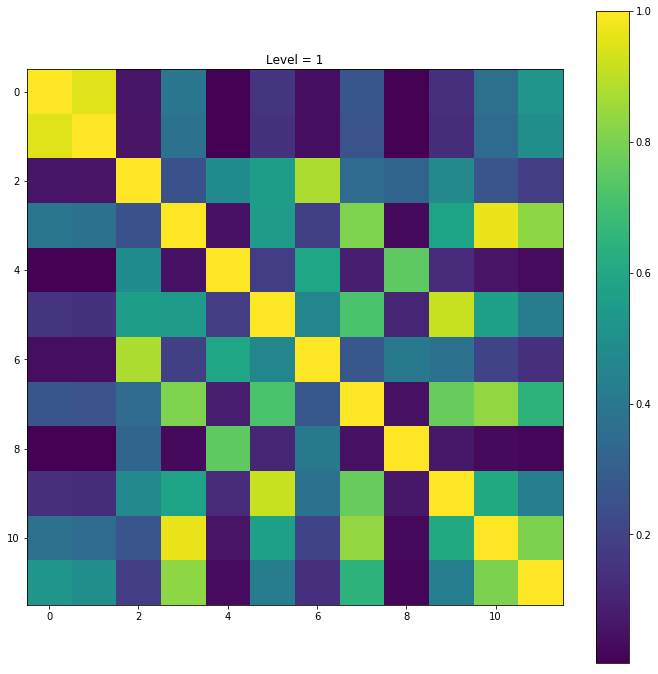

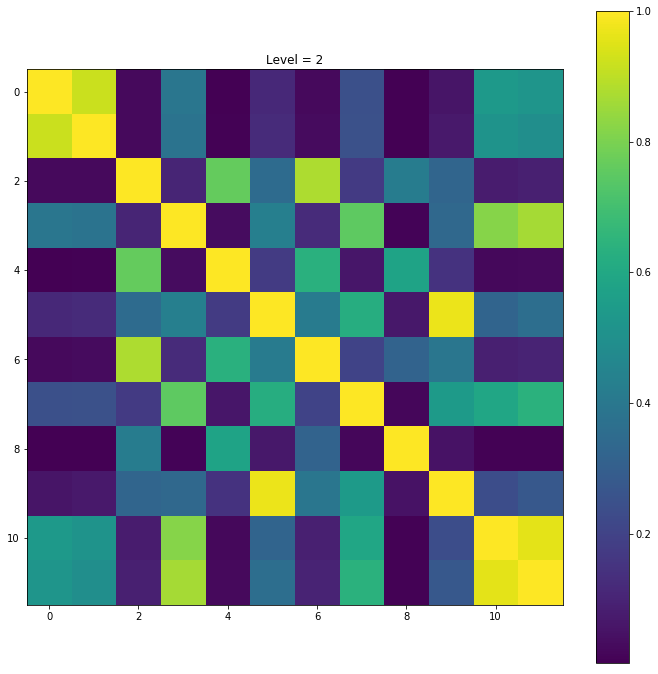

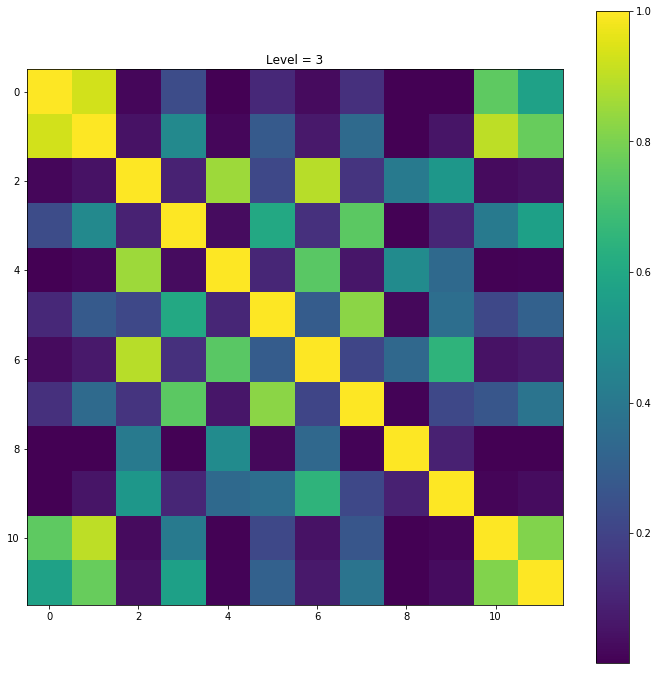

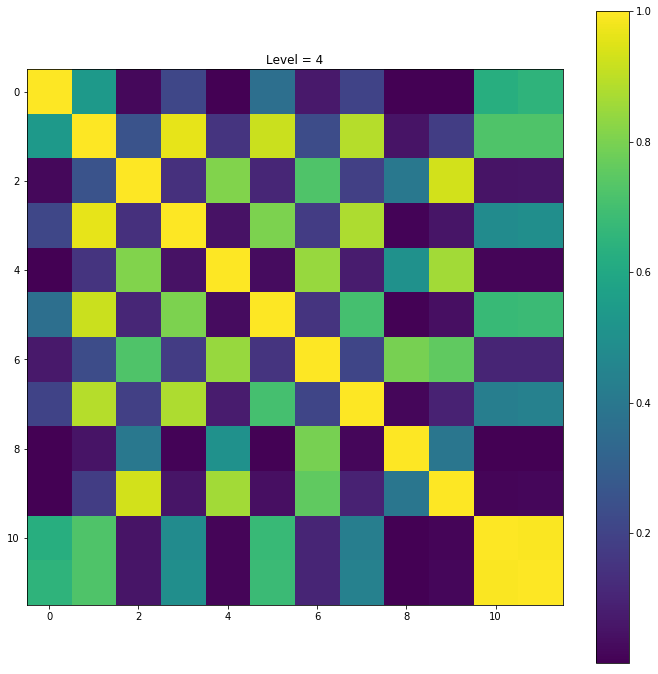

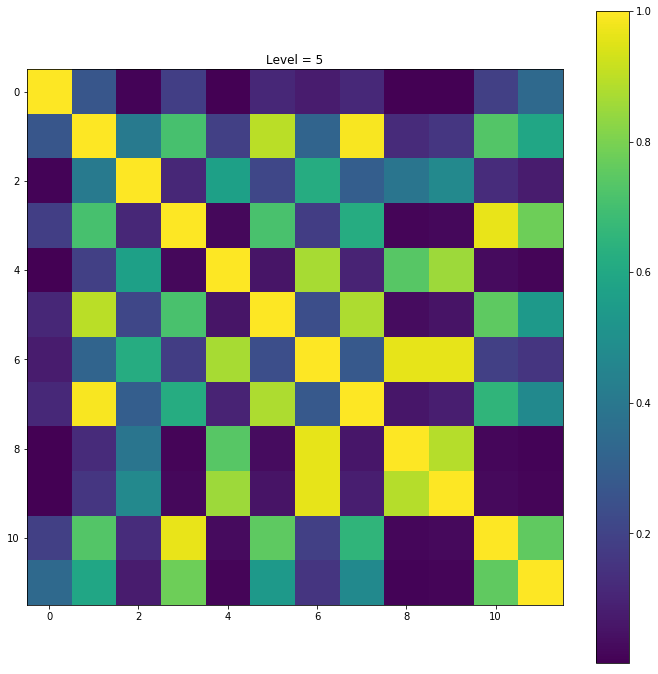

In [13]:
from scipy import stats
# list of all animals of interets
animals = [monkey1_5L_MeanOri, monkey2_5L_MeanOri, monkey3_5L_MeanOri, monkey4_5L_MeanOri,
          insect1_5L_MeanOri, insect2_5L_MeanOri, insect3_5L_MeanOri, insect4_5L_MeanOri,
          bird1_5L_MeanOri, bird2_5L_MeanOri, bird3_5L_MeanOri, bird4_5L_MeanOri]
animals_names = ["m1", "m2", "m3", "m4", "i1", "i2", "i3", "i4", "b1", "b2", "b3", "b4"]

for level in range(1,6):
    # level = 1
    # an empty array to store the p values
    pvalues = np.zeros((len(animals),len(animals)))

    for i in range(len(animals)):
        for j in range(len(animals)):
            # animal 1, all TR from all subjs
            a1 = animals[i][:,level-1,:].reshape(40*18)
            # animal 2, all TR from all subjs
            a2 = animals[j][:,level-1,:].reshape(40*18)
            # get pvalue from ttest
            pval = stats.ttest_ind(a1, a2)[1]
            pvalues[i,j] = pval
            print("L%d (%s, %s) = %s" % (level, animals_names[i], animals_names[j], pval))

    # print pvalues

    plt.figure(figsize=(12,12))
    plt.imshow(pvalues)
    plt.colorbar()
    plt.title("Level = %s" % level)

L1 (m1, m1) = 1.0
L1 (m1, m2) = 0.9496163000522897
L1 (m1, m3) = 0.05768766695667673
L1 (m1, m4) = 0.3937755148275045
L1 (m1, i1) = 0.0066600340450429065
L1 (m1, i2) = 0.15618046593447327
L1 (m1, i3) = 0.040030844738561444
L1 (m1, i4) = 0.2697026242067514
L1 (m1, b1) = 0.0031067391521165536
L1 (m1, b2) = 0.13810913237390737
L1 (m1, b3) = 0.37122191310635133
L1 (m1, b4) = 0.5223784799127857
L1 (m2, m1) = 0.9496163000522897
L1 (m2, m2) = 1.0
L1 (m2, m3) = 0.055813266211058365
L1 (m2, m4) = 0.37361382283173283
L1 (m2, i1) = 0.006679883595502835
L1 (m2, i2) = 0.1496491373393493
L1 (m2, i3) = 0.03889957584443698
L1 (m2, i4) = 0.2568100255075605
L1 (m2, b1) = 0.003137537504213923
L1 (m2, b2) = 0.13314586871097125
L1 (m2, b3) = 0.35235576797940416
L1 (m2, b4) = 0.49485050493682115
L1 (m3, m1) = 0.05768766695667673
L1 (m3, m2) = 0.055813266211058365
L1 (m3, m3) = 1.0
L1 (m3, m4) = 0.2530771704169228
L1 (m3, i1) = 0.48671862932205257
L1 (m3, i2) = 0.5632266065145553
L1 (m3, i3) = 0.878380144456

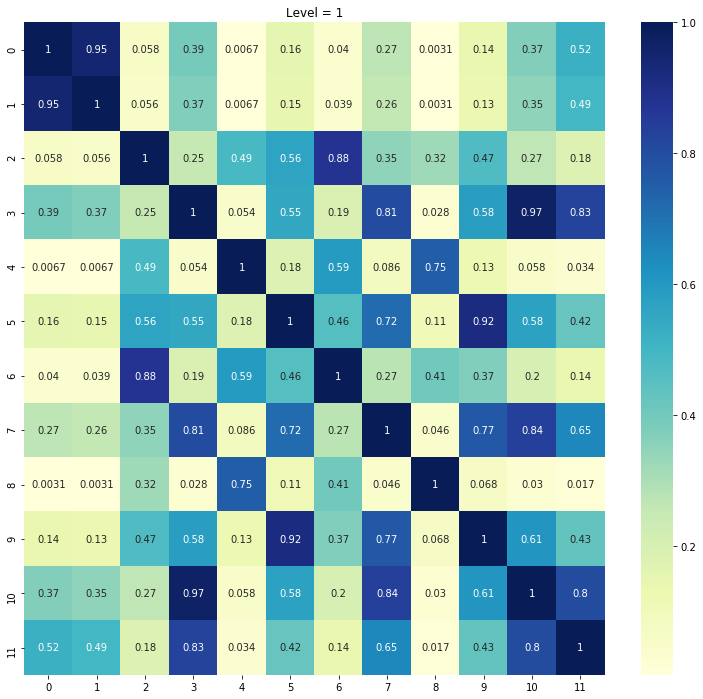

L2 (m1, m1) = 1.0
L2 (m1, m2) = 0.9191399271667344
L2 (m1, m3) = 0.02555113309317443
L2 (m1, m4) = 0.3925404689386469
L2 (m1, i1) = 0.004675745637367582
L2 (m1, i2) = 0.11773737074545612
L2 (m1, i3) = 0.027793468588705347
L2 (m1, i4) = 0.2453865507500128
L2 (m1, b1) = 0.001384778164698907
L2 (m1, b2) = 0.059563191921705894
L2 (m1, b3) = 0.5406793476984781
L2 (m1, b4) = 0.520588710700053
L2 (m2, m1) = 0.9191399271667344
L2 (m2, m2) = 1.0
L2 (m2, m3) = 0.027541468452469568
L2 (m2, m4) = 0.3819608495660958
L2 (m2, i1) = 0.005825483753653999
L2 (m2, i2) = 0.1234727012892889
L2 (m2, i3) = 0.030526622178388012
L2 (m2, i4) = 0.24739119837685045
L2 (m2, b1) = 0.0017427262291505275
L2 (m2, b2) = 0.07076248875403222
L2 (m2, b3) = 0.5137923345202983
L2 (m2, b4) = 0.49551152784707897
L2 (m3, m1) = 0.02555113309317443
L2 (m3, m2) = 0.027541468452469568
L2 (m3, m3) = 1.0
L2 (m3, m4) = 0.10584615688098757
L2 (m3, i1) = 0.7655801339036966
L2 (m3, i2) = 0.3495028972905133
L2 (m3, i3) = 0.87730423392019

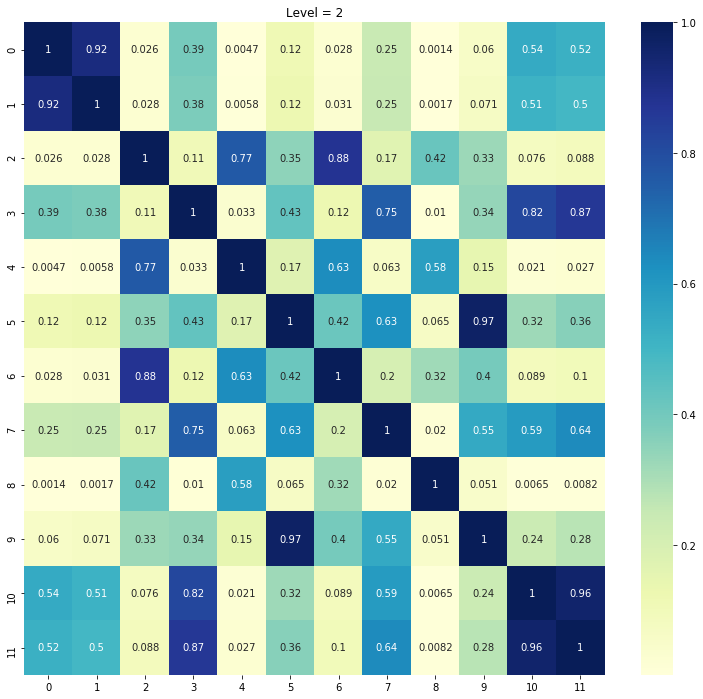

L3 (m1, m1) = 1.0
L3 (m1, m2) = 0.9297692898198917
L3 (m1, m3) = 0.016147100998579387
L3 (m1, m4) = 0.23258662149034792
L3 (m1, i1) = 0.0026304035990925506
L3 (m1, i2) = 0.11526528359703869
L3 (m1, i3) = 0.027842015386894313
L3 (m1, i4) = 0.13762352511262688
L3 (m1, b1) = 0.00037083444853117814
L3 (m1, b2) = 0.00409470186401856
L3 (m1, b3) = 0.7501807042795703
L3 (m1, b4) = 0.571464019537061
L3 (m2, m1) = 0.9297692898198917
L3 (m2, m2) = 1.0
L3 (m2, m3) = 0.04815843636889047
L3 (m2, m4) = 0.4727050079747853
L3 (m2, i1) = 0.01751814280675625
L3 (m2, i2) = 0.2838803266065646
L3 (m2, i3) = 0.07063394226049481
L3 (m2, i4) = 0.34546717942055316
L3 (m2, b1) = 0.0033591526918675375
L3 (m2, b2) = 0.055906512070730954
L3 (m2, b3) = 0.8997643456896165
L3 (m2, b4) = 0.7669260986266486
L3 (m3, m1) = 0.016147100998579387
L3 (m3, m2) = 0.04815843636889047
L3 (m3, m3) = 1.0
L3 (m3, m4) = 0.09546249890162332
L3 (m3, i1) = 0.8547760304349777
L3 (m3, i2) = 0.21714423163845933
L3 (m3, i3) = 0.89126066583

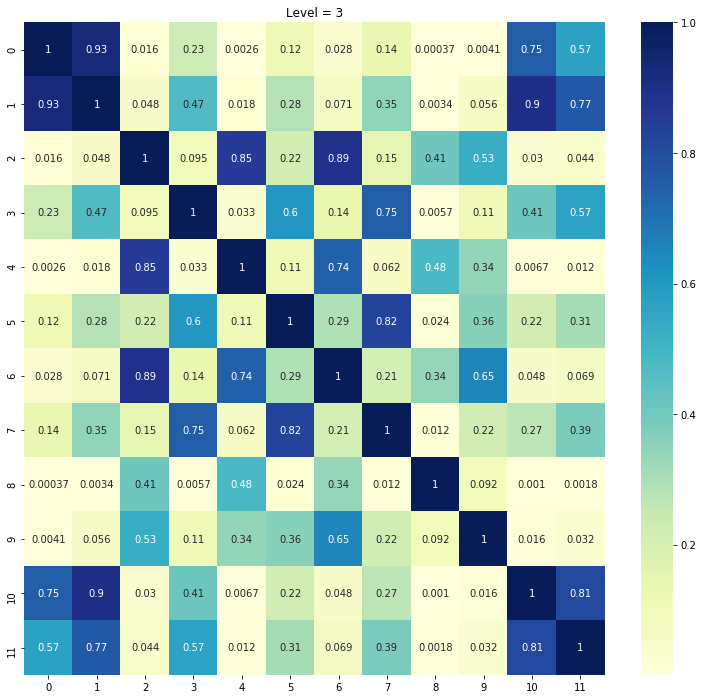

L4 (m1, m1) = 1.0
L4 (m1, m2) = 0.5388397792596857
L4 (m1, m3) = 0.023588335994841485
L4 (m1, m4) = 0.21405998180409766
L4 (m1, i1) = 0.003560929583782866
L4 (m1, i2) = 0.3654901269375328
L4 (m1, i3) = 0.06867518912997883
L4 (m1, i4) = 0.20240876501664556
L4 (m1, b1) = 0.0006308219346276175
L4 (m1, b2) = 0.00377361924756266
L4 (m1, b3) = 0.6255575978845287
L4 (m1, b4) = 0.6505020757729869
L4 (m2, m1) = 0.5388397792596857
L4 (m2, m2) = 1.0
L4 (m2, m3) = 0.2552636878964172
L4 (m2, m4) = 0.9623668165089028
L4 (m2, i1) = 0.1513309342154215
L4 (m2, i2) = 0.9193510608126345
L4 (m2, i3) = 0.2335335669382345
L4 (m2, i4) = 0.8894568742552712
L4 (m2, b1) = 0.05213120991470768
L4 (m2, b2) = 0.18333534026646278
L4 (m2, b3) = 0.725010063558272
L4 (m2, b4) = 0.7246906008199416
L4 (m3, m1) = 0.023588335994841485
L4 (m3, m2) = 0.2552636878964172
L4 (m3, m3) = 1.0
L4 (m3, m4) = 0.14071761316402204
L4 (m3, i1) = 0.8116905432735435
L4 (m3, i2) = 0.1074905979681314
L4 (m3, i3) = 0.7252861683027181
L4 (m3,

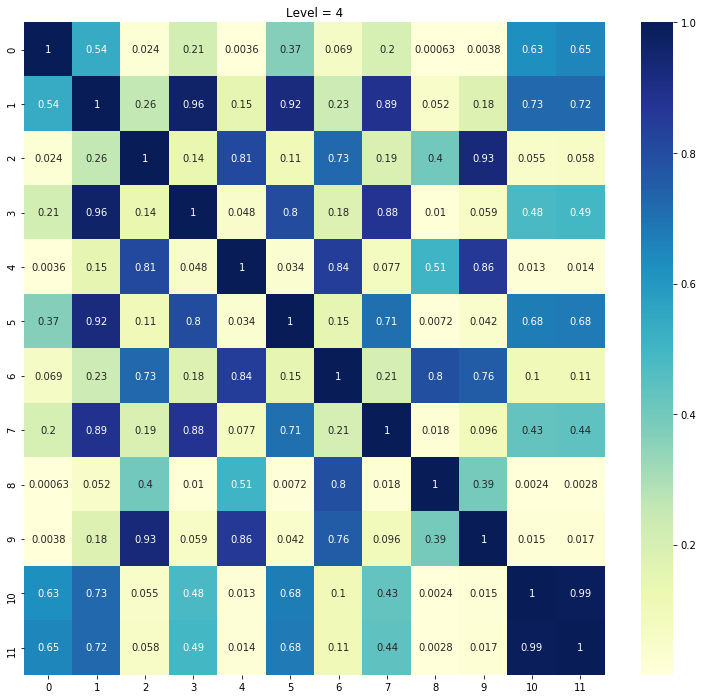

L5 (m1, m1) = 1.0
L5 (m1, m2) = 0.2682286415425289
L5 (m1, m3) = 0.010323776915026266
L5 (m1, m4) = 0.18455212502699705
L5 (m1, i1) = 0.0011275217680269806
L5 (m1, i2) = 0.11058105120711635
L5 (m1, i3) = 0.07601869868481224
L5 (m1, i4) = 0.1148709103977545
L5 (m1, b1) = 0.0008551672378419965
L5 (m1, b2) = 0.001575353552511622
L5 (m1, b3) = 0.19113544970153074
L5 (m1, b4) = 0.3417150352854411
L5 (m2, m1) = 0.2682286415425289
L5 (m2, m2) = 1.0
L5 (m2, m3) = 0.4126230451166203
L5 (m2, m4) = 0.7098116692988807
L5 (m2, i1) = 0.18903264095152383
L5 (m2, i2) = 0.8965138937752601
L5 (m2, i3) = 0.3213227018510358
L5 (m2, i4) = 0.9892984831706528
L5 (m2, b1) = 0.12289816889306024
L5 (m2, b2) = 0.15753689702978546
L5 (m2, b3) = 0.7338788019255604
L5 (m2, b4) = 0.5907077532338929
L5 (m3, m1) = 0.010323776915026266
L5 (m3, m2) = 0.4126230451166203
L5 (m3, m3) = 1.0
L5 (m3, m4) = 0.11277952922621168
L5 (m3, i1) = 0.5700710462698766
L5 (m3, i2) = 0.21428587348536415
L5 (m3, i3) = 0.6190773089384789
L

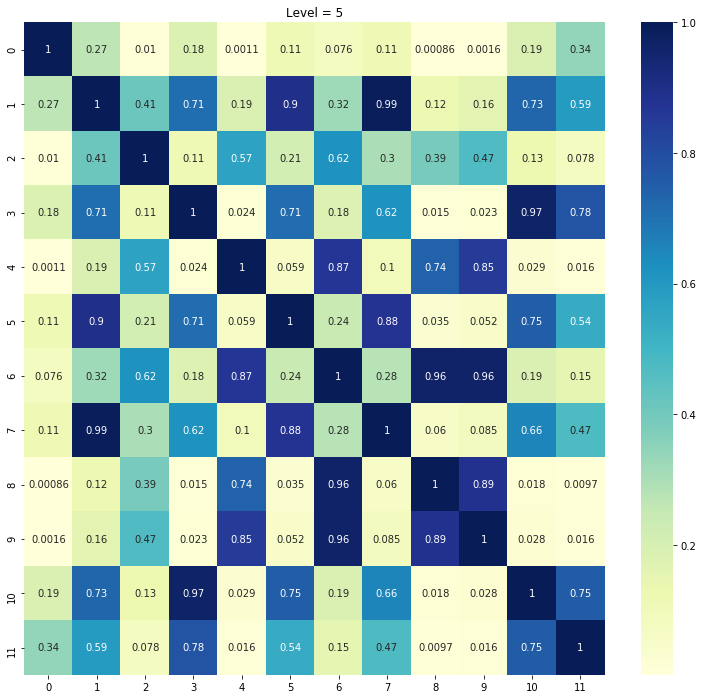

In [14]:
from scipy import stats
# list of all animals of interets
animals = [monkey1_5L_MeanOri, monkey2_5L_MeanOri, monkey3_5L_MeanOri, monkey4_5L_MeanOri,
          insect1_5L_MeanOri, insect2_5L_MeanOri, insect3_5L_MeanOri, insect4_5L_MeanOri,
          bird1_5L_MeanOri, bird2_5L_MeanOri, bird3_5L_MeanOri, bird4_5L_MeanOri]
animals_names = ["m1", "m2", "m3", "m4", "i1", "i2", "i3", "i4", "b1", "b2", "b3", "b4"]

for level in range(1,6):
    # level = 1
    # an empty array to store the p values
    pvalues = np.zeros((len(animals),len(animals)))

    for i in range(len(animals)):
        for j in range(len(animals)):
            # animal 1, all TR from all subjs
            a1 = animals[i][:,level-1,:].reshape(40*18)
            # animal 2, all TR from all subjs
            a2 = animals[j][:,level-1,:].reshape(40*18)
            # get pvalue from ttest
            pval = stats.ttest_ind(a1, a2)[1]
            pvalues[i,j] = pval
            print("L%d (%s, %s) = %s" % (level, animals_names[i], animals_names[j], pval))

    # print pvalues

    plt.figure(figsize=(13,12))
    ax = plt.axes()
    sns.heatmap(pvalues,annot=True,cmap="YlGnBu")
    ax.set_title("Level = %s" % level)
    plt.show()
    #plt.colorbar()
    #plt.title("Level = %s" % level)

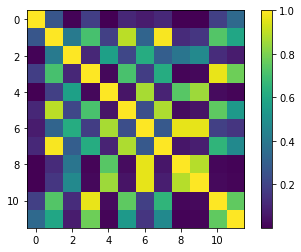

In [15]:
plt.imshow(pvalues)
plt.colorbar()